# Demo: Image Preprocessing - Resizing and Rescaling Images

In [38]:
# In this demo,
# we'll study a few image pre-processing techniques that you can use to 
# pre-process your image data before you feed them into your ML models.
# This will help you build robust models.

In [39]:
import skimage
import skimage.transform
import skimage.io
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [40]:
bird = mpimg.imread('datasets/images/bird.jpeg')

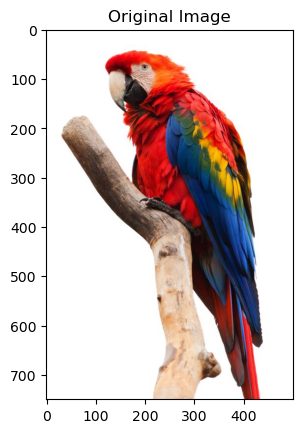

In [41]:
plt.title("Original Image")
plt.imshow(bird)

In [42]:
# Now, images, as you know, are basically just matrices.
# They are three dimensional matrices, height, width, and number of channels.
# This bird is a color image, or an RGB image,
# which is why the number of channels is three.

bird.shape

(750, 500, 3)

In [43]:
# Since an image is basically just a numpy matrix,
# all matrix slicing operations work with images.
# This will allow you to extract one portion of an image.
# Here is a slice of our image matrix.


# Observed at the innermost dimension is the number of channels.
# This is a three-channel image.
# There are three numbers used to represent a pixel, the R, G, and B values.
# For this image, each of these values is represented using an integer from 0 to 255.
# the result is r, g, b values of pixels between heigth proportion 200:250 and weight proportion 200:250 
bird_slice = bird[200:250, 200:250]

bird_slice

array([[[157,   9,   9],
        [178,  25,  28],
        [186,  30,  34],
        ...,
        [ 58,  90, 167],
        [ 45,  84, 151],
        [ 57, 102, 157]],

       [[148,   6,   5],
        [164,  18,  21],
        [170,  21,  27],
        ...,
        [ 68,  91, 171],
        [ 51,  84, 153],
        [ 61, 101, 160]],

       [[139,   3,   5],
        [150,   9,  15],
        [152,   9,  15],
        ...,
        [ 71,  88, 170],
        [ 56,  85, 155],
        [ 63, 103, 165]],

       ...,

       [[197,  26,  16],
        [209,  28,  21],
        [215,  26,  24],
        ...,
        [ 35,  53, 125],
        [ 49,  42, 119],
        [ 41,  48, 116]],

       [[199,  27,  17],
        [213,  30,  26],
        [220,  32,  30],
        ...,
        [ 31,  49, 121],
        [ 45,  38, 115],
        [ 34,  43, 108]],

       [[199,  27,  17],
        [210,  28,  24],
        [215,  31,  29],
        ...,
        [ 33,  52, 121],
        [ 41,  41, 113],
        [ 31,  45, 108]]

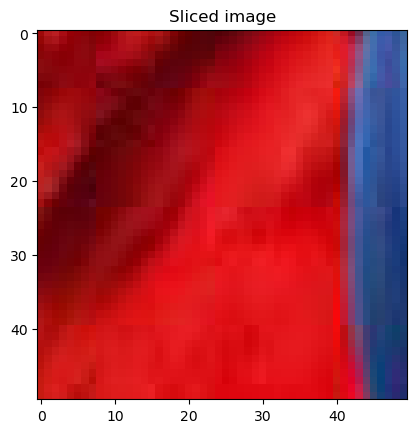

In [44]:
plt.title("Sliced image")
plt.imshow(bird_slice)

In [45]:
# Since an image is just a matrix,
# reshape operations on matrices work with images as well.
# Here I have preserved the height of the image,
# but I have reshaped the width and the channel values.
# The resulting shape of this matrix is 750 x 1500. Fifteen hundred is equal to 500 multiplied by the 3 channels.

# -1 makes the 2nd and 3rd dimensions a single vector, 500 (r) + 500 (g) + 500 (b)
bird_reshape = bird.reshape(bird.shape[0], -1)

bird_reshape.shape

(750, 1500)

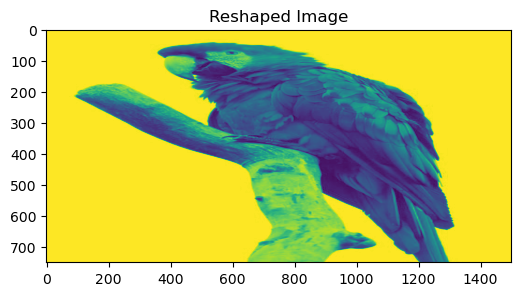

In [46]:
# You can view this reshaped image as well,
# and you can see our distorted bird where our three
# channels have been separated out.

plt.figure(figsize = (6,6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

In [47]:
# When you're working with machine learning,
# all of the images that you feed in to train your ML
# model have to be of the same size.
# Well, in the real world, this is not going to be the case,
# so you'll have to use resize transformations.

# I have resized the original image to a 500 x 500 image here using scikit-image.
bird_resized = skimage.transform.resize(bird, (500, 500))

# Here is the shape of my resized bird.
# It's still a 3-channel image, 500 x 500.
bird_resized.shape

(500, 500, 3)

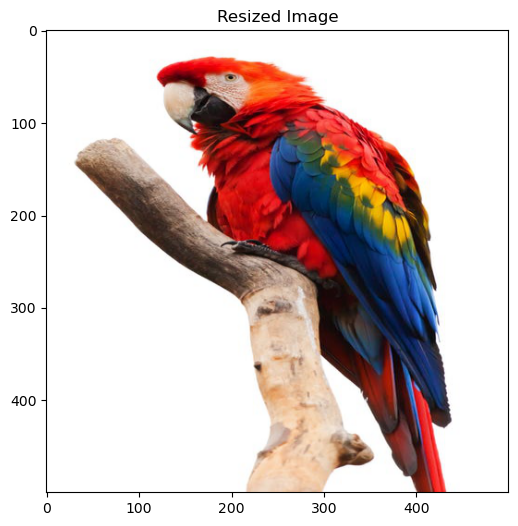

In [48]:
# Let's view this in matplotlib, and here is the bird resized, but distorted.
# This is because during the resize we did not preserve the
# aspect ratio of the original image.

plt.figure(figsize = (6,6))
plt.title("Resized Image")
plt.imshow(bird_resized)

In [49]:
# The aspect ratio of any image is the width of the image divided by the height.
# Let's calculate the aspect ratio of the original image and our
# resized bird and print these out to screen.
# You can see that the aspect ratio of the original image was 0.66,
# but our resized aspect ratio was 1.
# This is why the image was distorted.

aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


In [50]:
# Let's rescale the original image so that the aspect ratio is preserved.
# We can use the rescale function from the scikit-image library.
# We pass as input the resized bird.
# The height will be equal to 1.
# We preserved the height,
# and the width is equal to the aspect ratio of the original image.
# Here is our rescale image, which is 500 x 33.

bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original), multichannel=True)
# the below one works as well:
# bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original), order=0, 
#                                          multichannel=True, anti_aliasing=False)

bird_rescaled.shape

(500, 333, 3)

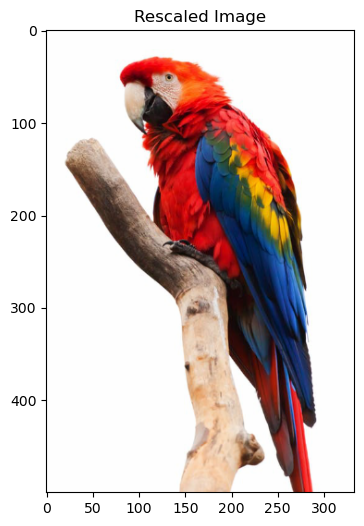

In [51]:
# and if you print this out to screen using matplotlib,
# you can see that this bird is no longer distorted.
# We've kept the height of the bird at 500 pixels,
# this is what our resized image was,
# but we've changed the width so that the aspect ratio of
# the original image is now preserved.

plt.figure(figsize=(6,6))
plt.title("Rescaled Image")
plt.imshow(bird_rescaled)

In [52]:
# If you now calculate the aspect ratio of this rescaled bird,
# that is width divided by height,
# you'll see that the rescale aspect ratio is equal to the original 0.66.

aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])
print("Rescaled aspect ration: ", aspect_ratio_rescaled)

Rescaled aspect ration:  0.666


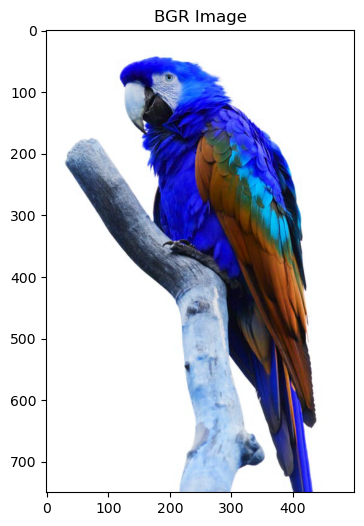

In [53]:
# You can also use matrix operations to switch around the order of your channels.
# Here we are converting the original image, which had channels in the order R, G, B, that is Red, Green, Blue,
# to switch the order of the channels around so that they are now in the BGR format, Blue, Green, Red.

# [height, width, (RED, GREEN, BLUE)] --> [height, width, (BLUE, GREEN, RED)]
bird_BGR = bird[:, :, (2, 1, 0)]


# Now that we have flipped the channels around,
# let's display this image in matplotlib,
# and you can see that the image is now strangely
# colored because matplotlib assumes RGB.

plt.figure(figsize=(6,6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [54]:
# If you take a look at the shape of the image,
# you'll see that it's exactly the same as before,
# we've only flipped the channel information around to
# suit our machine learning framework.

bird_BGR.shape

(750, 500, 3)

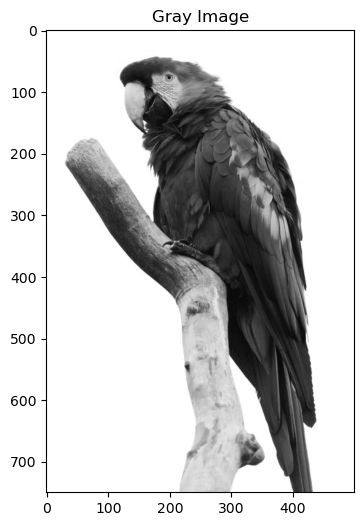

In [55]:
# Other transformations that might be useful would be to convert a color or
# multi-channel image to a grayscale or or single-channel image,
# and for this you can use skimage.color.rgb2gray().
bird_gray = skimage.color.rgb2gray(bird)

# Our original color image will be converted to grayscale,
# and you can display this to screen and see that it's now a grayscale image.
plt.figure(figsize=(6, 6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap='gray')

In [56]:
# If you take a look at the shape of this image,
# you'll see that it's a single-channel image.
# You only have the height and width information, and the last dimension is 1.
# Since its dimension is 1, the last dimension has been squeezed,
# so we have just two dimensions in the shape.
bird_gray.shape

(750, 500)

# Demo: Cropping and Denoising Images

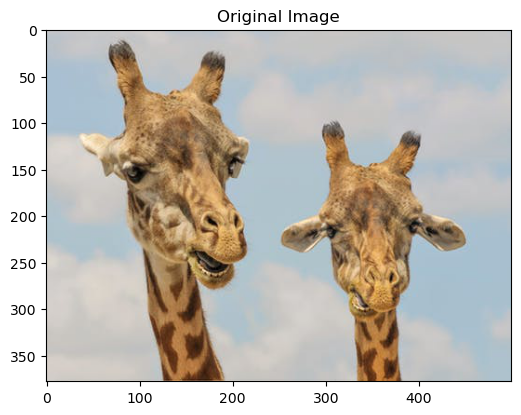

In [57]:
# Let's continue exploring some more image pre-processing techniques.
# I'm going to read in a new image of giraffes here,
# and I'm going to use skimage.img_as_float(),
# so I have all of the pixel representations of this
# image as floating-point numbers.
giraffes = skimage.img_as_float(skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

# And I'm going to go ahead and display this image using matplotlib.
# Here are my two giraffes.
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(giraffes)

In [58]:
# Once again, this is a color image,
# as you can see when you see the shape of this image, it's 378 pixels by 500 pixels, and 3 channels.
giraffes.shape

(378, 500, 3)

In [59]:
# An operation that you might want to perform is to crop an image so that you
# zoom in and focus on the important portions of that image.
# I'm going to define a function here,
# which takes in an image and cropx and cropy values.
# cropx and cropy are the width and height of the cropped image.

def crop(image, cropx, cropy):
    # I'll extract the height, width,
    # and the channels of the original image in the variables y, x, and c.
    y, x, c = image.shape
    
    # Here is where you can specify where you want to center your crop.
    # I center my crop halfway horizontally,
    # and one-third of the way from the top of the image vertically.
    startx = x//2 - (cropx // 8)
    starty = y//3 - (cropy // 4)
    # Calculate startx and starty pixel positions where you start your crop,
    # and stopx and stopy pixel positions where you end your crop.
    stopx = startx + cropx
    stopy = starty + 2*cropy
    
    # And we return from this function a sliced portion of the original image.
    # Observe that we don't change anything in the channel dimension.
    return image[starty:stopy, startx:stopx] # y refers to height, x refers to width

In [60]:
# With this function defined, we are ready to crop our giraffe.
# for the cropped image: in the orig image, x starts at 218 and ends in 474, y starts 62 and ends at 574 (where y is 378, will be sliced up to 378)
giraffes_cropped = crop(giraffes, 256, 256)

# resulting cropped image will be 318 x 256.
giraffes_cropped.shape

(316, 256, 3)

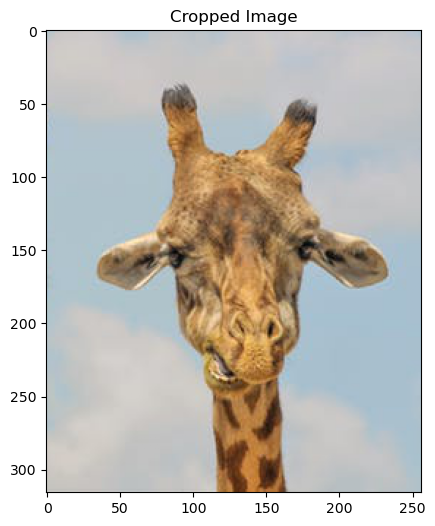

In [78]:
# Once we have the cropped image, go ahead and display it,
# and here we are zoomed into the giraffe on the left,
# the one which has the strange expression.
plt.figure(figsize=(6,6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)
# plt.imsave("./giraffe_with_strange_expression.png", giraffes_cropped)

In [62]:
# It's possible that when you're working with real-world images,
# the original image is noisy.
# Let's see how you can deal with that using denoising filters.
# I'm going to create a noisy image to use here.
# I import the random_noise module from skimage.util,
from skimage.util import random_noise

In [83]:
# and I'm going to add gaussian noise with bandwidth sigma (standard deviation) equal to 0.155.
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var=sigma**2)

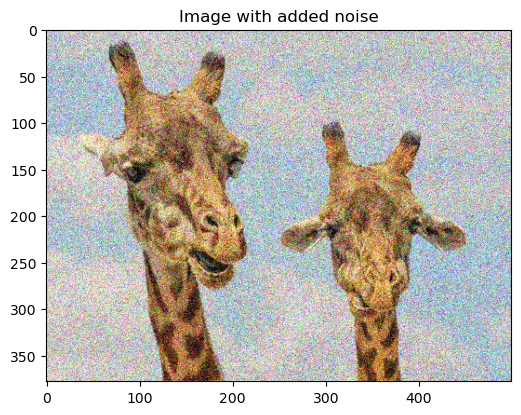

In [65]:
# So after adding random_noise to your original giraffes image,
# let's display this noisy image and see what it looks like.

plt.figure(figsize=(6,6))
plt.title("Image with added noise")
plt.imshow(noisy_giraffes)

# You can see that the image is no longer so clear,
# the random_noise utility has added gaussian noise to this image.

In [67]:
# Now let's use our denoising filters,
# and there are three denoising filters that you can work with in scikit-image.
# Each of these filters have their own strengths and weaknesses,
# and the exact details of that is out of scope for this particular course.
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [69]:
# There is this useful estimage_sigma function,
# though, that scikit-image offers,
# that allows you to estimate the noise level in a particular image.
sigma_est = estimate_sigma(noisy_giraffes,
                          multichannel=True,
                          average_sigmas=True)

In [71]:
# You can see that the estimated bandwidth for our gaussian noise about 0.148,
# very close to the 0.155 that we used.
sigma_est

0.14807327749926716

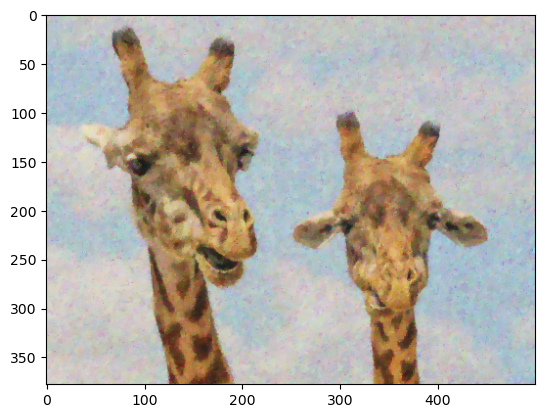

In [80]:
# Let's denoise our giraffes image using the first of our filters.
# This is the total variation filter - denoise_tv_chambolle.
# The weight here refers to the denoising weight.
# The greater the weight,
# the more denoising that will occur at the expense
# of fidelity to the input image.
plt.imshow(denoise_tv_chambolle(noisy_giraffes,
                               weight=0.1,
                               multichannel=True))

# This might take a minute or so to run, and here is the denoised image.
# You can see that it's far better than the noisy image that we started off with.

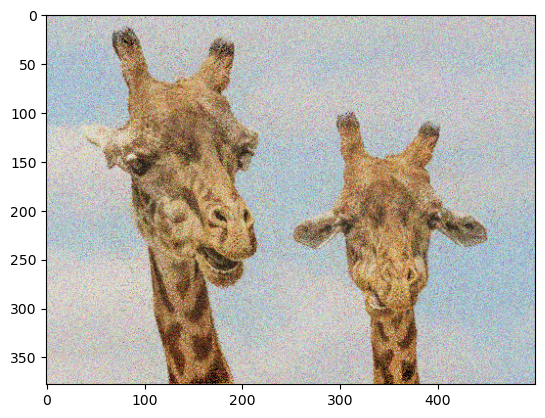

In [82]:
# Let's use another denoising filter.
# This time we'll use the bilateral filter.
# This is an edge-preserving filter.
# It averages pixels based on how close they are spatially,
# and how similar they are.
plt.imshow(denoise_bilateral(noisy_giraffes,
                            sigma_color=0.05,
                            sigma_spatial=15,
                            multichannel=True))

# And here is the denoised image from our bilateral filter.
# Once again, a lot better than the noisy image that we started off with.

C:\Users\CavaJ\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  after removing the cwd from sys.path.


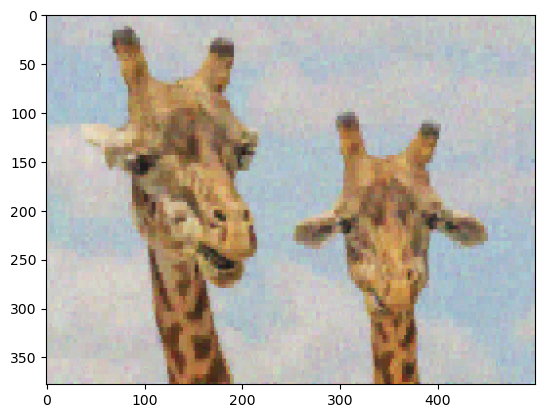

In [88]:
# Let's work with the third filter here, the wavelet filter.
# This filter transforms the original image to another representation in
# the wavelet domain before it performs denoising.
plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))

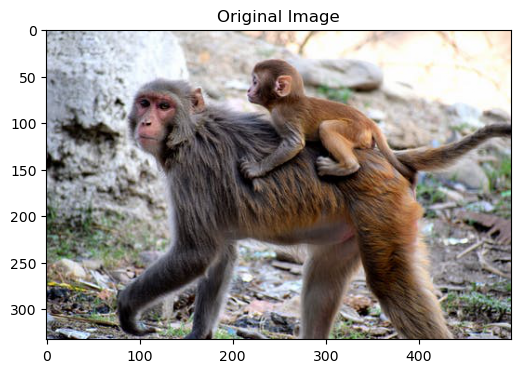

In [90]:
# Denoising images is a useful transformation to apply to your input data.
# Let's move on to work with another image, this one of monkeys.
monkeys = skimage.img_as_float(skimage.io.imread("datasets/images/monkeys.jpeg")).astype(np.float32)

plt.figure(figsize = (6,6))
plt.title("Original Image")
plt.imshow(monkeys)

In [92]:
# A common operation that you'd preform when you feed in your images to a machine learning model, is to flip your images around randomly.
# This will allow you to build more robust models.
# You can use the numpy fliplr() function for this; flipr means flip left right.

monkeys_flip = np.fliplr(monkeys)

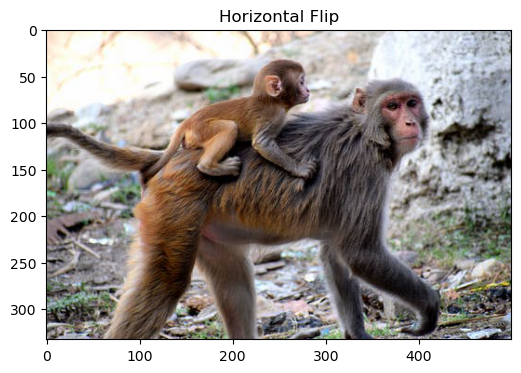

In [93]:
# Here is the resulting flipped image.
# You can see that the monkeys are now moving towards the right instead of the left.
plt.figure(figsize=(6, 6))
plt.title("Horizontal Flip")
plt.imshow(monkeys_flip)

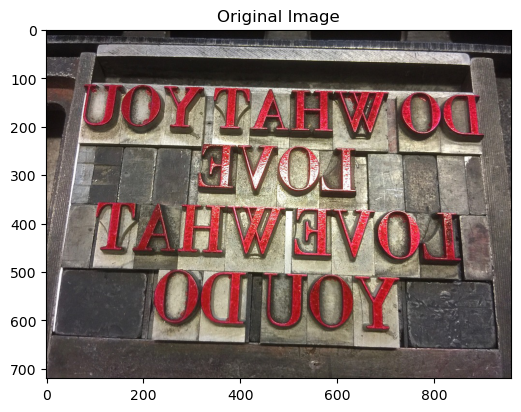

In [95]:
# Flipping your images is not just useful to create variation in your input data,
# but also when you're working with text.
# Maybe you're building a model for optical character recognition.

mirror = skimage.img_as_float(skimage.io.imread('datasets/images/book-mirrored.jpg')).astype(np.float32)

plt.figure(figsize = (6,6))
plt.title("Original Image")
plt.imshow(mirror)

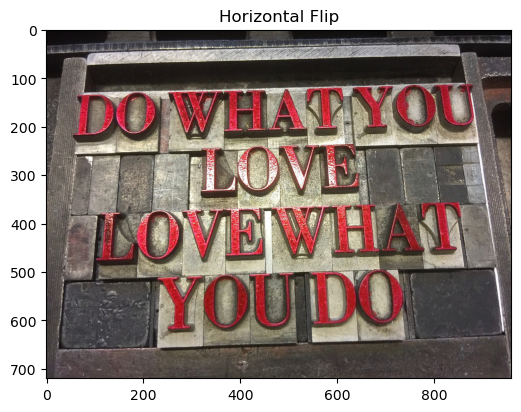

In [96]:
# If the original image that you're working with has the text mirrored,
# you might want to apply the fliplr operation to flip the image around.
# You can now perform OCR on this image.

mirror_flip = np.fliplr(mirror)

plt.figure(figsize=(6, 6))
plt.title("Horizontal Flip")
plt.imshow(mirror_flip)